## Oppgave 2 a)

[ 88  93 104 105  96 114 109 103 141 128 140 159 143 133 133 139 182 160
 168 160 182 174 161 160 154 174 172 170 180 192 205 180 203 219 192 220
 217 212 215 226 236 231 238 223 213 235 232 213 245 264 254 258 260 263
 257 265 242 260 273 285 290 292 287 277 299 309 294 305 289 302 313 309
 320 340 319 307 339 320 321 346 339 346 357 360 355 348 367 361 371 374
 358 386 387 374 368 398 402 379 394 409 404]


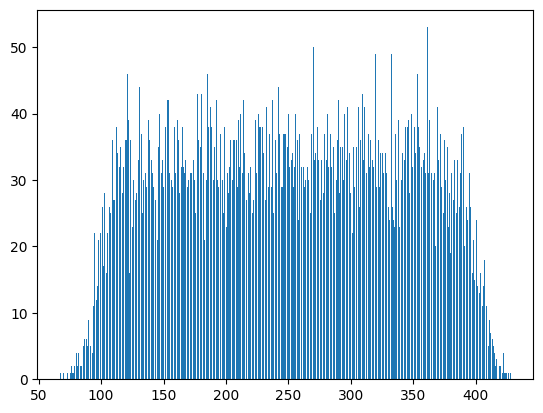

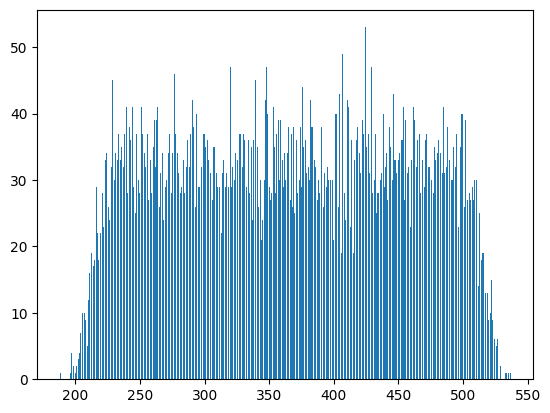

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
kb = 1.38 * 10**-23
T = 298
beta = 1/(kb*T)

def V21(x):
    return 1/beta
def V22(x):
    return -x/beta

def walkDirection(pMinus,pPluss):
    tilfeldigVerdi = np.random.ranf()
    if tilfeldigVerdi<=pMinus:
        return -1
    elif tilfeldigVerdi >=(1-pPluss):
        return 1
    else:
        return 0



def sannsynligheter(beta,V,x):
    pPluss = 1/(1+np.exp(-beta*(V(x-1)-V(x+1)))+np.exp(-beta*(V(x)-V(x+1))))
    pMinus = 1/(1+np.exp(-beta*(V(x+1)-V(x-1)))+np.exp(-beta*(V(x)-V(x-1))))
    return pMinus, pPluss


def simulasjon(steg, beta, V, antallPartikler, mellomrom):
    posisjoner = np.arange(100,(antallPartikler)*(mellomrom+1)+100,mellomrom+1)
    for i in range(steg):
        for j in range(len(posisjoner)):
            pMinus, pPluss = sannsynligheter(beta,V,posisjoner[j])
            skritt =  walkDirection(pMinus,pPluss)
            posisjoner[j]+=skritt
    return posisjoner

def plotGjennomsnitt(steg, beta, V, antallPartikler, mellomrom, antallSimulasjoner, simulasjon):
    posisjonerArray = np.array([simulasjon(steg, beta, V, antallPartikler, mellomrom) for _ in range(antallSimulasjoner)])
    posisjonerArray = posisjonerArray.flatten()
    numberArray = np.array([0 for _ in range(200+(antallPartikler-1)*(mellomrom+1)+1)])
    for i in range(len(numberArray)):
        numberArray[i]=(posisjonerArray==i).sum()
    plt.hist(posisjonerArray,bins=500)
    plt.show()

    return

print(simulasjon(200,beta,V21,101,2))
plotGjennomsnitt(200,beta,V21,101,2,100,simulasjon)
plotGjennomsnitt(200,beta,V22,101,2,100,simulasjon)

## Oppgave 2 b)

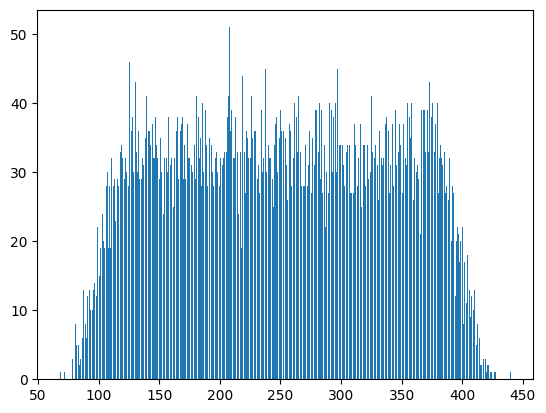

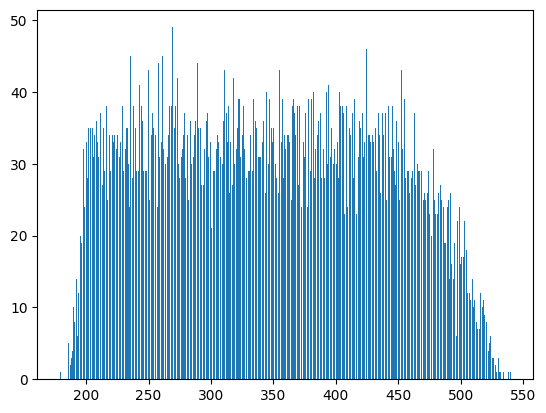

In [27]:
def simulasjonKollisjon(steg, beta, V, antallPartikler, mellomrom):
    posisjoner = np.arange(100,(antallPartikler)*(mellomrom+1)+100,mellomrom+1)
    for i in range(steg):
        for j in range(len(posisjoner)):
            pMinus, pPluss = sannsynligheter(beta,V,posisjoner[j])
            skritt =  walkDirection(pMinus,pPluss)
            if not ((posisjoner[j] + skritt) in posisjoner):
                posisjoner[j]+=skritt
    return posisjoner

plotGjennomsnitt(200,beta,V21,101,2,100,simulasjonKollisjon)
plotGjennomsnitt(200,beta,V22,101,2,100,simulasjonKollisjon)

## Oppgave 2 c)

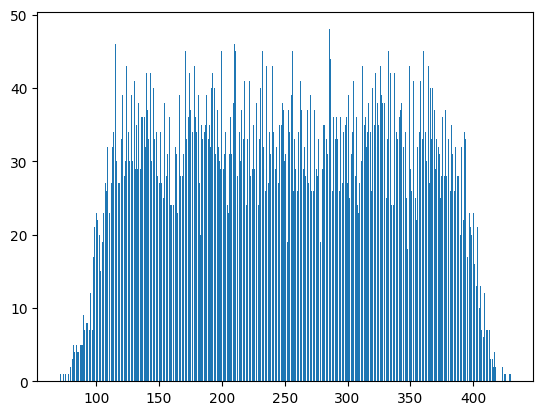

C:\Users\elias\AppData\Local\Temp\ipykernel_30544\2549529413.py:25: RuntimeWarning: overflow encountered in exp
  pMinus = 1/(1+np.exp(-beta*(V(x+1)-V(x-1)))+np.exp(-beta*(V(x)-V(x-1))))


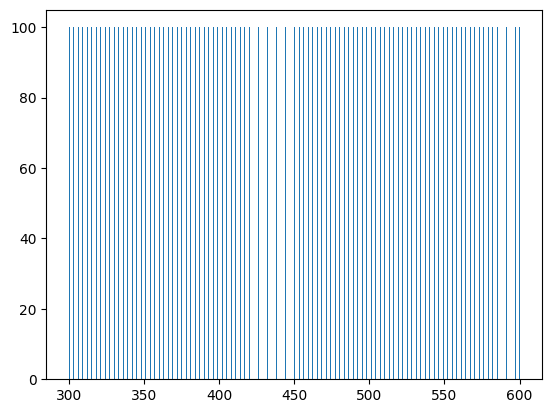

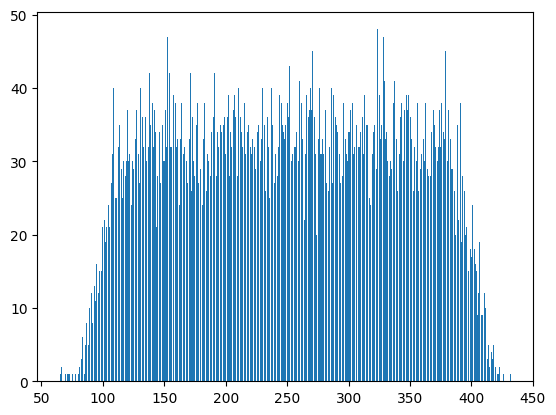

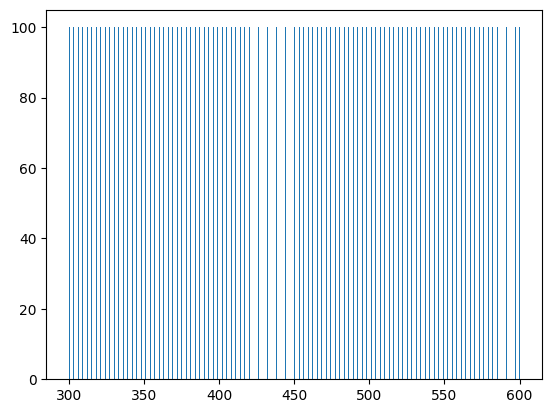

In [28]:
def V21_1000(x):
    return 1000/beta
def V22_1000(x):
    return -x*1000/beta

plotGjennomsnitt(200,beta,V21_1000,101,2,100,simulasjon)
plotGjennomsnitt(200,beta,V22_1000,101,2,100,simulasjon)
plotGjennomsnitt(200,beta,V21_1000,101,2,100,simulasjonKollisjon)
plotGjennomsnitt(200,beta,V22_1000,101,2,100,simulasjonKollisjon)

## Oppgave 3 a)

In [72]:
#import math as math
from numba import njit

@njit
def walkDirection(pMinus,pPluss):
    tilfeldigVerdi = np.random.ranf()
    if tilfeldigVerdi<=pMinus:
        return -1
    elif tilfeldigVerdi >=(1-pPluss):
        return 1
    else:
        return 0

@njit
def V31(x,N_x,alpha,k):
    xPeriodisk = x % N_x
    if xPeriodisk < alpha*N_x:
        return k*xPeriodisk/(alpha*N_x*beta)
    else:
        xPeriodisk = xPeriodisk-N_x
        return -k*xPeriodisk/((1-alpha)*N_x*beta)


@njit
def V32(x,N_x,alpha,k):
    return 1/beta

@njit
def sannsynligheter3(beta,V,x,N_x,alpha,k,t,T_p):
    #pPluss = 1/(1+np.exp(-beta*(V(x-1,N_x,alpha,k)-V(x+1,N_x,alpha,k)))+np.exp(-beta*(V(x,N_x,alpha,k)-V(x+1,N_x,alpha,k))))
    #pMinus = 1/(1+np.exp(-beta*(V(x+1,N_x,alpha,k)-V(x-1,N_x,alpha,k)))+np.exp(-beta*(V(x,N_x,alpha,k)-V(x-1,N_x,alpha,k))))
    a = -beta * (periodiskPotensial(t,T_p,x,N_x-1,alpha,k) - periodiskPotensial(t,T_p,x+1,N_x,alpha,k))
    b = -beta * (periodiskPotensial(t,T_p,x,N_x,alpha,k) - periodiskPotensial(t,T_p,x+1,N_x,alpha,k))
    c = -beta * (periodiskPotensial(t,T_p,x+1,N_x,alpha,k) - periodiskPotensial(t,T_p,x-1,N_x,alpha,k))
    d = -beta * (periodiskPotensial(t,T_p,x,N_x,alpha,k) - periodiskPotensial(t,T_p,x-1,N_x,alpha,k))

    if a>50:
        a=50
    elif a<-50:
        a=-50
    if b>50:
        b=50
    elif b<-50:
        b=-50
    if c>50:
        c=50
    elif c<-50:
        c=-50
    if d>50:
        d=50
    elif d<-50:
        d=-50
    
    pPluss = 1.0 / (1.0 + np.exp(a) + np.exp(b))
    pMinus = 1.0 / (1.0 + np.exp(c) + np.exp(d))

    return pMinus, pPluss
@njit
def periodiskPotensial(t,T_p,x,N_x,alpha,k):
    if t % (2*T_p) < T_p:
        return V32(x,N_x,alpha,k)
    else:
        return V31(x,N_x,alpha,k)

@njit
def walkStep(N_x,alpha,k,N_p,t,T_p,X):
    nPluss = 0
    nMinus = 0
    for j in range(len(X)):
            pMinus, pPluss = sannsynligheter3(beta,periodiskPotensial,X[j],N_x,alpha,k,t,T_p)
            skritt =  walkDirection(pMinus,pPluss)

            if skritt==1:
                nPluss +=1
                if X[j]==199:
                    X[j] = 0
                else: 
                    X[j]+=skritt
            elif skritt==-1:
                nMinus +=1
                if X[j]==0:
                    X[j] = 199
                else: 
                    X[j]+=skritt

    return X, (nPluss-nMinus)/N_p


def Simulasjon3(T_p,N_x,alpha,k,N_p,cycles):
    X=np.array([[i,i,i,i,i,i] for i in range(N_p//6)]).flatten() # lager en 1200 stor array med hver siffer fra og med 0 til og med 199 6 ganger på rad
    normalisertPartikkelFlytGjennomsnittArray = np.zeros(cycles)
    for cycle in range(cycles):
        normalisertPartikkelFlytArray = np.zeros(2*T_p)
        for t in range(2*T_p):
            X, normalisertPartikkelFlyt = walkStep(N_x,alpha,k,N_p,t,T_p,X)
            normalisertPartikkelFlytArray[t] = (normalisertPartikkelFlyt)
        normalisertPartikkelFlytGjennomsnitt = normalisertPartikkelFlytArray.sum()/(2*T_p)
        normalisertPartikkelFlytGjennomsnittArray[cycle] = normalisertPartikkelFlytGjennomsnitt
    return X, normalisertPartikkelFlytGjennomsnittArray

X_10, normalisertPartikkelFlytGjennomsnittArray = Simulasjon3(500,100,0.8,1000,1200,10)



In [75]:
normalisertPartikkelFlytGjennomsnittArray
#X = np.linspace(0,200,200)
#y_values = np.array([V31(X[i],100,0.8,1) for i in range(len(X))])
#plt.plot(X,y_values)
#plt.show()

array([-0.02866333, -0.0169525 , -0.01590333, -0.01538583, -0.01632833,
       -0.0179925 , -0.01755583, -0.01640583, -0.01473417, -0.01724083])